 # RESCALING EVERYTHING

In [1]:
%cd '/mnt/scratch-lustre/horlaville/clara_limlam/limCode2020-master_clara_2/'

/fs/lustre/scratch/horlaville/clara_limlam/limCode2020-master_clara_2


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [3]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [55]:
# Initialize LineModel with default model
m = lim()
m_cii = lim('Lichen_v4', doSim = True)

m_cii.update(model_par = {'zdex': 0.4,
 'M0': 1900000000.0,
 'Mmin': 20000000000,
 'alpha_MH1': 0.74,
 'alpha_LCII': 0.024,
 'alpha0': -1.412,
 'gamma0': 0.31,
 'BehrooziFile': 'sfr_reinterp.dat'},
            dnu = 2.8*u.GHz,
            nuObs = 270*u.GHz,
            Delta_nu = 40*u.GHz,
            tobs = 40000*u.h,
            Omega_field = 4*u.deg**2,
            catalogue_file = '/home/dongwooc/scratchspace/pprun_hiz_npz/COMAP_z5.8-7.9_960Mpc_seed_13819.npz')

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


# Need to rescale signal by 123%, pspec by (123%)² and noisy mocks need to be regenerated because of noise

Need to check that if a given array is stored somewhere, that I can just overwrite it with np.save at that same location with a new array. Use a dummy example to make sure 100% that it works

In [4]:
dum = np.ones((2,3))
dum

array([[1., 1., 1.],
       [1., 1., 1.]])

In [5]:
np.save('/mnt/scratch-lustre/horlaville/dum.npy', dum)

In [6]:
dumm = np.load('/mnt/scratch-lustre/horlaville/dum.npy')

In [8]:
new_dum = 2*dumm

In [9]:
np.save('/mnt/scratch-lustre/horlaville/dum.npy', new_dum)

In [10]:
new_dumm = np.load('/mnt/scratch-lustre/horlaville/dum.npy')

In [11]:
new_dumm

array([[2., 2., 2.],
       [2., 2., 2.]])

It works

In [13]:
sig_scale = 1.23
pspec_scale = (1.23**2)

Personalize noise:

In [ ]:
3172.8111 Jysr

In [139]:
sigm = m_cii.sigma_N # for tobs = 40000h from parameters update above
sigm

<Quantity 3172.81108492 Jy / sr>

In [64]:
def own_noise(m, sig, pix=1.):
    
    '''
    m is the limlam object
    sig is the 3D cube of intensities
    pix is the pixelization blurring desired. default is 1.
    '''
    
    sm_map = gaussian_filter(sig, [pix, pix, 0])
    noise_sigma  = sigm
    noise_map    = np.random.normal(0, noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m.nuObs)).value, sig.shape)
    # print(noise_sigma.to(u.Jy/u.sr).value)
    sm_noise_map = sm_map + noise_map
    
    return sm_noise_map

In [65]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [66]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_27/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [67]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_35/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [68]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_312/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [69]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_512/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [70]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e9-9/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [71]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10-1/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [96]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [73]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [97]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [98]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [99]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

In [100]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    newfor = own_noise(m_cii, sigisc)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/sig/cii_sig'+str(i)+'.npy', sigisc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/for/for_tobs40kh/cii_for'+str(i)+'.npy', newfor)

pspec:

In [80]:
pspec_scale

1.5129

In [79]:
for i in range(len(onlyfiles)):
    
    pspec270 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/pspec/cii_pspec'+str(i)+'.npy')
    pspec226 = np.load('/mnt/scratch-lustre/horlaville/nuObs226/zdex04/cii_pspec_nuObs226/cii_pspec'+str(i)+'.npy')
    
    pspec270sc = pspec_scale*pspec270
    pspec226sc = pspec_scale*pspec226
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/pspec/cii_pspec'+str(i)+'.npy', pspec270sc)
    np.save('/mnt/scratch-lustre/horlaville/nuObs226_corr/zdex04/cii_pspec_nuObs226/cii_pspec'+str(i)+'.npy', pspec226sc)

with zdex:

In [81]:
for i in range(len(onlyfiles)):
    
    pspec = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex00/pspec/cii_pspec'+str(i)+'.npy')    
    
    pspecsc = pspec_scale*pspec
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex00/pspec/cii_pspec'+str(i)+'.npy', pspecsc)

In [82]:
for i in range(len(onlyfiles)):
    
    pspec = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex02/pspec/cii_pspec'+str(i)+'.npy')    
    
    pspecsc = pspec_scale*pspec
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex02/pspec/cii_pspec'+str(i)+'.npy', pspecsc)

In [84]:
for i in range(len(onlyfiles)):
    
    pspec = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex06/pspec/cii_pspec'+str(i)+'.npy')    
    
    pspecsc = pspec_scale*pspec
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex06/pspec/cii_pspec'+str(i)+'.npy', pspecsc)

In [85]:
for i in range(len(onlyfiles)):
    
    pspec = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex08/pspec/cii_pspec'+str(i)+'.npy')    
    
    pspecsc = pspec_scale*pspec
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex08/pspec/cii_pspec'+str(i)+'.npy', pspecsc)

In [86]:
for i in range(len(onlyfiles)):
    
    pspec = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex10/pspec/cii_pspec'+str(i)+'.npy')    
    
    pspecsc = pspec_scale*pspec
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex10/pspec/cii_pspec'+str(i)+'.npy', pspecsc)

stacks:

In [87]:
sig_scale

1.23

In [90]:
for i in range(len(onlyfiles)):
    
    stac = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/stacks/LBGs_z5-9/sig/sig'+str(i)+'.npy', allow_pickle=True)    
    
    stasc = sig_scale*stac
    
    stasc.dump('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/stacks/LBGs_z5-9/sig/sig'+str(i)+'.npy')

In [91]:
for i in range(len(onlyfiles)):
    
    stac = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/stacks/cii_z6/sig/sig'+str(i)+'.npy', allow_pickle=True)    
    
    stasc = sig_scale*stac
    
    stasc.dump('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/stacks/cii_z6/sig/sig'+str(i)+'.npy')

In [138]:
def own_noise(m, sign, sigm, pix=1.):
    
    '''
    m is the limlam object
    sign is the 3D cube of intensities
    sigm is the noise level
    pix is the pixelization blurring desired. default is 1.
    '''
    
    sm_map = gaussian_filter(sign, [pix, pix, 0])
    noise_sigma  = sigm
    noise_map    = np.random.normal(0, 
                                    noise_sigma.to(u.Jy/u.sr, equivalencies=u.brightness_temperature(m.nuObs)).value,
                                    sign.shape)
    # print(noise_sigma.to(u.Jy/u.sr).value)
    sm_noise_map = sm_map + noise_map
    
    return sm_noise_map

beam:

In [130]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

In [131]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

In [132]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

In [133]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-020/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-020/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

In [134]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-028/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-028/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

In [135]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-68/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-68/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

In [136]:
for i in range(len(onlyfiles)):
    
    sigi = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-80/sig/cii_sig'+str(i)+'.npy')
    
    sigisc = sig_scale*sigi
    beamed = own_noise(m_cii, sign=sigisc, sigm=0.*u.Jy/u.sr, pix=.5)
    
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-80/beam/pix_0-5/cii_beam'+str(i)+'.npy', beamed)

# debug zdex

In [201]:
print('sigma_N =', m_cii.sigma_N)

for_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    w1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    scw1 = 1.23*w1
    for_zdex04[i] = own_noise(m_cii, sign=scw1, sigm=m_cii.sigma_N, pix=1.)

sigma_N = 3172.8110849200834 Jy / sr


In [202]:
for_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    w1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')
    
    scw1 = 1.23*w1
    for_zdex03[i] = own_noise(m_cii, sign=scw1, sigm=m_cii.sigma_N, pix=1.)

In [203]:
for_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    w1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')
    
    scw1 = 1.23*w1
    for_zdex05[i] = own_noise(m_cii, sign=scw1, sigm=m_cii.sigma_N, pix=1.)

In [146]:
lc_paths = '/home/dongwooc/scratchspace/pprun_hiz_npz/'
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(lc_paths) if isfile(join(lc_paths, f))]
onlyfiles.remove('pksc2npz_5313591.out')
onlyfiles.remove('pksc2npz.sh')
for i in range(len(onlyfiles)):
    onlyfiles[i] = lc_paths+onlyfiles[i]

In [147]:
lin_binning = np.linspace(-4*10**(4), 4*10**(4), 80)
lin_center = (lin_binning[:-1] + lin_binning[1:]) / 2

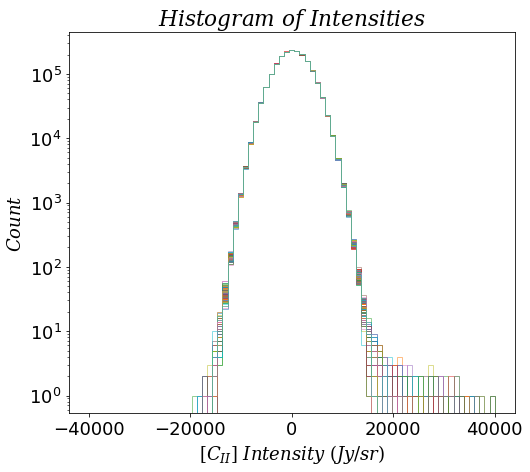

In [204]:
n_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    n_zdex03[i], _, _ = plt.hist(for_zdex03[i].flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

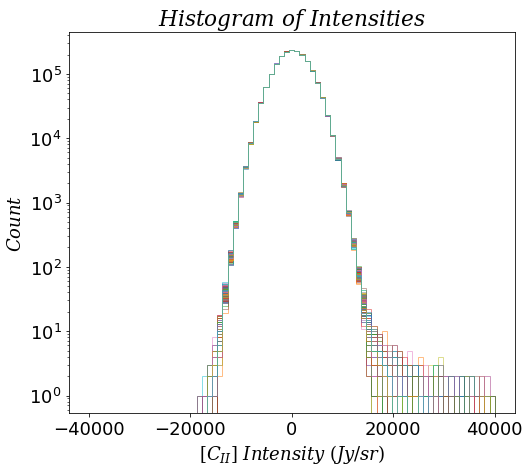

In [205]:
n_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    n_zdex04[i], _, _ = plt.hist(for_zdex04[i].flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

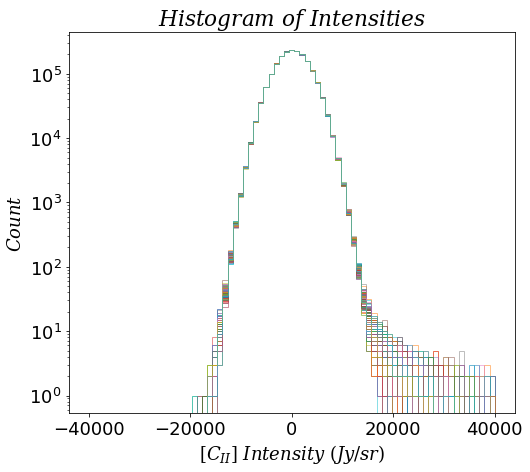

In [206]:
n_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    n_zdex05[i], _, _ = plt.hist(for_zdex05[i].flatten(), bins = lin_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [207]:
avg_zdex03 = np.mean(n_zdex03, axis = 0)
avg_zdex04 = np.mean(n_zdex04, axis = 0)
avg_zdex05 = np.mean(n_zdex05, axis = 0)

/tmp/ipykernel_1784112/848194659.py:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(lin_center/1000, avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2)
/tmp/ipykernel_1784112/848194659.py:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(lin_center/1000, avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2)
/tmp/ipykernel_1784112/848194659.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(lin_center/1000, avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2)
/tmp/ipykernel_1784112/848194659.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(lin_center/1000, avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2)


(-15.0, 20.0)

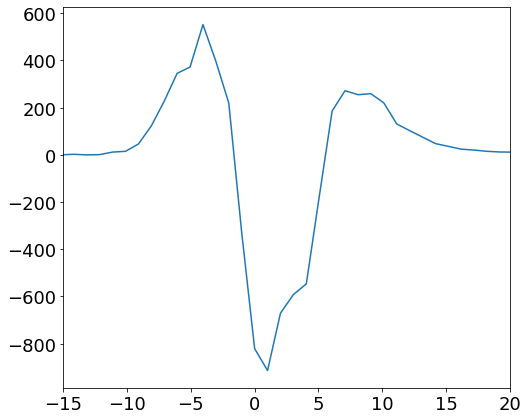

In [208]:
plt.plot(lin_center/1000, avg_zdex04*(np.log(avg_zdex05/avg_zdex04) - np.log(avg_zdex03/avg_zdex04))/0.2)
plt.xlim([-15, 20])

In [211]:
for i in range(len(onlyfiles)):
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/for/for_tobs40kh_alt/cii_for'+str(i)+'.npy', for_zdex04[i])
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex03/for/for_tobs40kh_alt/cii_for'+str(i)+'.npy', for_zdex03[i])
    np.save('/mnt/scratch-lustre/horlaville/nuObs270_corr/zdex05/for/for_tobs40kh_alt/cii_for'+str(i)+'.npy', for_zdex05[i])

odd beam:

In [216]:
beam_binning = np.logspace(0, np.log10(25000), 50)
beam_center = (beam_binning[:-1] + beam_binning[1:]) / 2

In [213]:
beam05_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    w1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex04/alpha_cii_0-024/alpha_mhi_0-74/Mmin_2-10e10/alpha0_-1_412/gamma0_0_31/sig/cii_sig'+str(i)+'.npy')
    
    scw1 = 1.23*w1
    beam05_zdex04[i] = own_noise(m_cii, sign=scw1, sigm=0.*u.Jy/u.sr, pix=.5)

In [214]:
beam05_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    w1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex03/sig/cii_sig'+str(i)+'.npy')
    
    scw1 = 1.23*w1
    beam05_zdex03[i] = own_noise(m_cii, sign=scw1, sigm=0.*u.Jy/u.sr, pix=.5)

In [215]:
beam05_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    w1 = np.load('/mnt/scratch-lustre/horlaville/nuObs270/zdex05/sig/cii_sig'+str(i)+'.npy')
    
    scw1 = 1.23*w1
    beam05_zdex05[i] = own_noise(m_cii, sign=scw1, sigm=0.*u.Jy/u.sr, pix=.5)

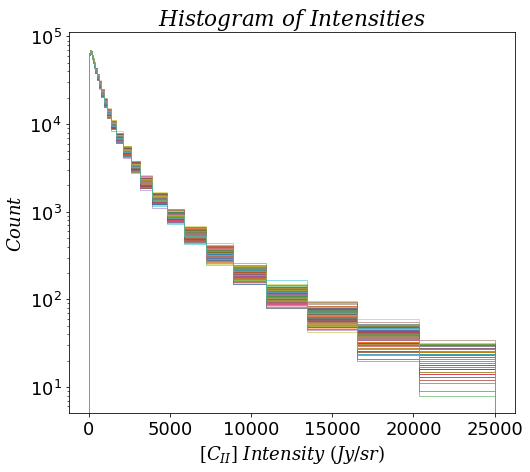

In [217]:
nb_zdex03 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb_zdex03[i], _, _ = plt.hist(beam05_zdex03[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

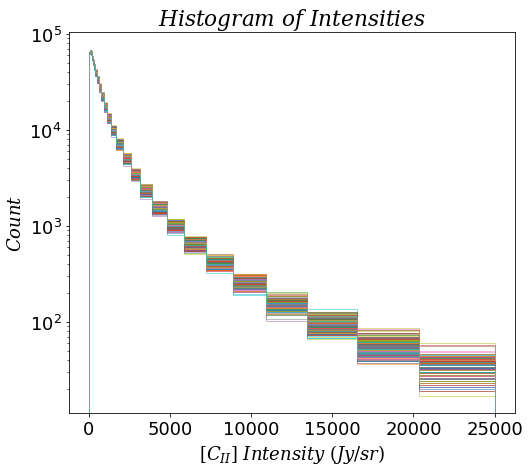

In [218]:
nb_zdex04 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb_zdex04[i], _, _ = plt.hist(beam05_zdex04[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

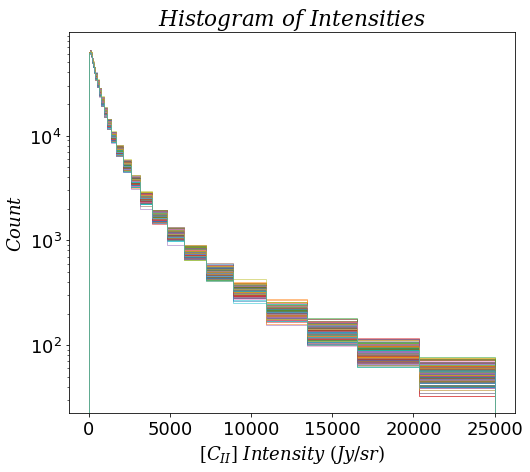

In [219]:
nb_zdex05 = [0 for i in range(len(onlyfiles))]

for i in range(len(onlyfiles)):
    
    nb_zdex05[i], _, _ = plt.hist(beam05_zdex05[i].flatten(), bins = beam_binning, alpha = 0.5, histtype = 'step')
    
    plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
    plt.ylabel(r'$Count$')
    plt.yscale('log')
    plt.title(r'$Histogram\ of\ Intensities$')

In [220]:
avgb_zdex03 = np.mean(nb_zdex03, axis = 0)
avgb_zdex04 = np.mean(nb_zdex04, axis = 0)
avgb_zdex05 = np.mean(nb_zdex05, axis = 0)

In [ ]:
avgb_zdex03b = np.load('/mnt/scratch-lustre/horlaville/nuObs270_corr/dsrel/beam/pix_0-5/')
avgb_zdex04b = np.mean(nb_zdex04, axis = 0)
avgb_zdex05b = np.mean(nb_zdex05, axis = 0)

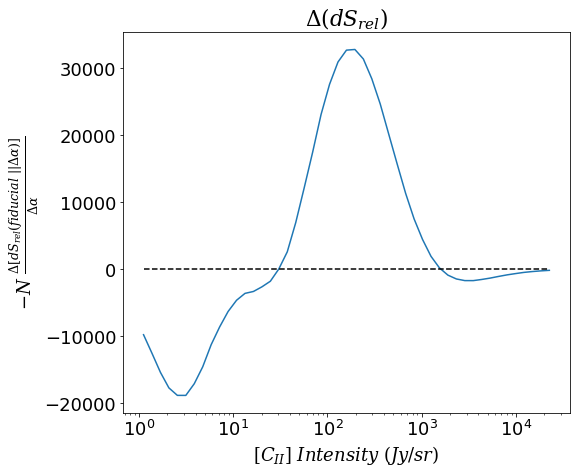

In [224]:
plt.plot(beam_center, -avgb_zdex04*(np.log(avgb_zdex05/avgb_zdex04) - np.log(avgb_zdex03/avgb_zdex04))/0.2)

plt.xlabel(r'$[C_{II}]\ Intensity\ (Jy/sr)$')
plt.ylabel(r'$-N\ \frac{\Delta [dS_{rel}(fiducial\ \vert \vert \Delta \alpha)]}{\Delta \alpha}$')
plt.title(r'$\Delta(dS_{rel})$')
plt.xscale('log')
#plt.yscale('log')
plt.hlines(y = 0, xmin = beam_center[0], xmax = beam_center[-1], linestyle = '--', color = 'k')